<a href="https://colab.research.google.com/github/jomscan/CEIABDTA/blob/main/Actividad_3_5_%E2%80%93_Clasificaci%C3%B3n_de_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jontahan Martin Sanchez

In [21]:
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt




In [22]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    #df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=';')
    return df

In [23]:
df = upload_files()
df.head()

Saving winequality-white.csv to winequality-white.csv
User uploaded file "winequality-white.csv" with length 264426 bytes


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


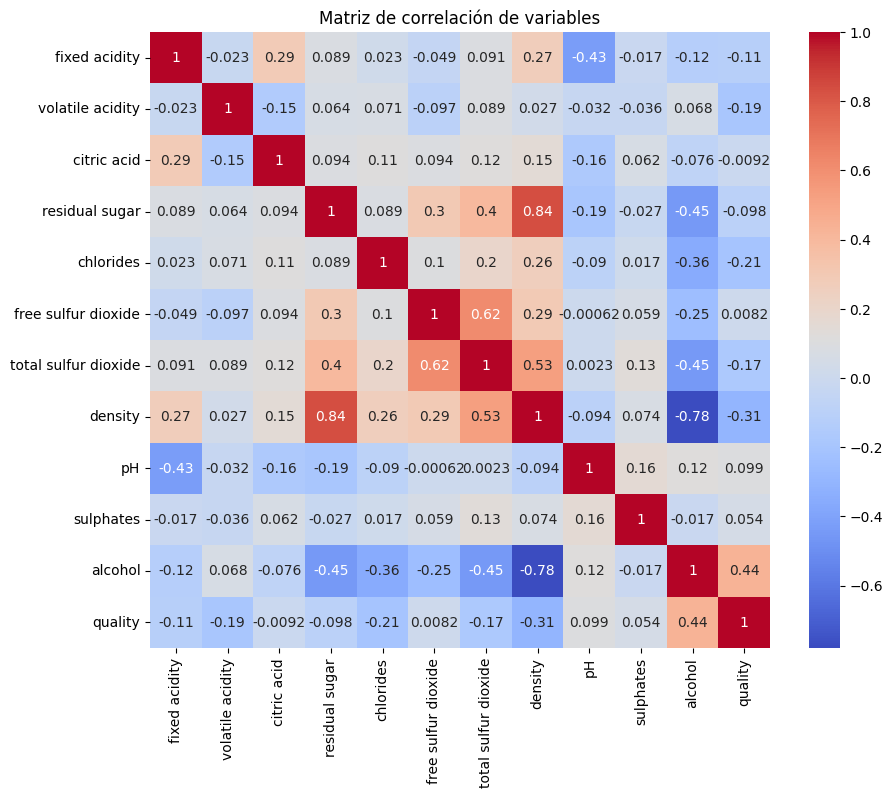

In [24]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación de variables")
plt.show()


In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separar variables predictoras (X) y la variable objetivo (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Aplicar SelectKBest para obtener el score de todas las variables
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Crear un DataFrame con los scores obtenidos
scores_df = pd.DataFrame({
    'Característica': X.columns,
    'Puntuación': selector.scores_
}).sort_values(by='Puntuación', ascending=False)

print("Puntuaciones de las características:")
print(scores_df)


Puntuaciones de las características:
          Característica  Puntuación
10               alcohol  229.734772
7                density  105.856434
1       volatile acidity   61.916739
6   total sulfur dioxide   45.200949
4              chlorides   42.472252
3         residual sugar   21.270285
5    free sulfur dioxide   19.723674
0          fixed acidity   12.894792
8                     pH   10.103289
9              sulphates    3.642317
2            citric acid    3.245745


In [26]:
# Separar variables predictoras (X) que quiero desechar
selected_features = ['residual sugar', 'pH', 'free sulfur dioxide','chlorides','fixed acidity']
X = df.drop(selected_features, axis=1)
y = df['quality']
X

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.27,0.36,170.0,1.00100,0.45,8.8,6
1,0.30,0.34,132.0,0.99400,0.49,9.5,6
2,0.28,0.40,97.0,0.99510,0.44,10.1,6
3,0.23,0.32,186.0,0.99560,0.40,9.9,6
4,0.23,0.32,186.0,0.99560,0.40,9.9,6
...,...,...,...,...,...,...,...
4893,0.21,0.29,92.0,0.99114,0.50,11.2,6
4894,0.32,0.36,168.0,0.99490,0.46,9.6,5
4895,0.24,0.19,111.0,0.99254,0.46,9.4,6
4896,0.29,0.30,110.0,0.98869,0.38,12.8,7


In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB ,MultinomialNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier

# Definir los clasificadores
nb_model = GaussianNB()
nb_multinomial = MultinomialNB()
nb_bernoulli = BernoulliNB()
nb_complement = ComplementNB()
knn_model = KNeighborsClassifier(n_neighbors=5)

# Definir validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar con Cross Validation utilizando la métrica de precisión (accuracy)
scores_nb = cross_val_score(nb_model, X, y, cv=cv, scoring='accuracy')
score_multinomial = cross_val_score(nb_multinomial, X, y, cv=cv, scoring='accuracy')
score_bernoulli = cross_val_score(nb_bernoulli, X, y, cv=cv, scoring='accuracy')
score_complement = cross_val_score(nb_complement, X, y, cv=cv, scoring='accuracy')
scores_knn = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

print("Precisión media de Naive Bayes: {:.4f} (+/- {:.4f})".format(scores_nb.mean(), scores_nb.std()))
print("Precisión media de Naive Bayes Multinomial: {:.4f} (+/- {:.4f})".format(score_multinomial.mean(), score_multinomial.std()))
print("Precisión media de Naive Bayes Bernoulli: {:.4f} (+/- {:.4f})".format(score_bernoulli.mean(), score_bernoulli.std()))
print("Precisión media de Naive Bayes Complement: {:.4f} (+/- {:.4f})".format(score_complement.mean(), score_complement.std()))
print("Precisión media de KNN: {:.4f} (+/- {:.4f})".format(scores_knn.mean(), scores_knn.std()))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Precisión media de Naive Bayes: 1.0000 (+/- 0.0000)
Precisión media de Naive Bayes Multinomial: 0.4877 (+/- 0.0101)
Precisión media de Naive Bayes Bernoulli: 0.4481 (+/- 0.0018)
Precisión media de Naive Bayes Complement: 0.3610 (+/- 0.0113)
Precisión media de KNN: 0.8865 (+/- 0.0186)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar el modelo KNN
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular y mostrar la matriz de confusión y la precisión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión (conjunto de prueba):")
print(cm)

acc = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba: {:.4f}".format(acc))



Matriz de confusión (conjunto de prueba):
[[  0   1   5   0   0   0   0]
 [  0   7  40   1   1   0   0]
 [  0   4 405  28   0   0   0]
 [  0   0  25 631   4   0   0]
 [  0   0   0  47 216   1   0]
 [  0   0   0   3  31  19   0]
 [  0   0   0   0   0   1   0]]
Precisión en el conjunto de prueba: 0.8694


In [29]:
import joblib

# Exportar (serializar) el modelo a un archivo .pkl
joblib.dump(best_model, 'modelo_knn.pkl')
print("Modelo exportado a 'modelo_knn.pkl'")


Modelo exportado a 'modelo_knn.pkl'


In [30]:
# Cargar el modelo previamente guardado
modelo_importado = joblib.load('modelo_knn.pkl')
print("Modelo importado desde 'modelo_knn.pkl'")


Modelo importado desde 'modelo_knn.pkl'


In [31]:
# Realizar predicciones sobre todo el dataset
y_pred_all = modelo_importado.predict(X)

# Calcular la matriz de confusión sobre todo el dataset
cm_all = confusion_matrix(y, y_pred_all)
print("Matriz de confusión (predicción sobre todo el dataset):")
print(cm_all)


Matriz de confusión (predicción sobre todo el dataset):
[[   3    5   12    0    0    0    0]
 [   0   44  115    3    1    0    0]
 [   0    7 1383   67    0    0    0]
 [   0    1   46 2143    8    0    0]
 [   0    0    1  108  770    1    0]
 [   0    0    0    7   83   85    0]
 [   0    0    0    0    2    3    0]]


In [32]:
# Calcular la precisión sobre todo el dataset
acc_all = accuracy_score(y, y_pred_all)
print("Precisión sobre todo el dataset: {:.4f}".format(acc_all))


Precisión sobre todo el dataset: 0.9040
